In [0]:
import urllib
import numpy as np
from PIL import Image
from scipy import linalg
from io import BytesIO

In [0]:
def download(url):
  with urllib.request.urlopen(url) as f:
    data = f.read()
    return Image.open(BytesIO(data))

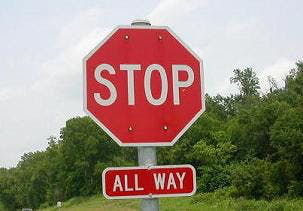

In [0]:
URL = "https://kaityo256.github.io/python_zero/numpy/stop.jpg"
download(URL)

In [0]:
def mono(url):
  img = download(url)
  gray_img = img.convert('L')
  return gray_img

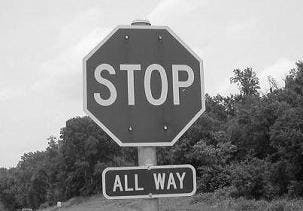

In [0]:
URL = "https://kaityo256.github.io/python_zero/numpy/stop.jpg"
mono(URL)

In [0]:
def svd(url, ratio):
  gray_img = mono(url)
  a = np.asarray(gray_img)
  w, _ = a.shape
  rank = int(w*ratio)
  u, s, v = linalg.svd(a)
  ur = u[:, :rank]
  sr = np.matrix(linalg.diagsvd(s[:rank], rank, rank))
  vr = v[:rank, :]
  b = np.asarray(ur*sr*vr)
  # 最大値を制限  b = 
  return Image.fromarray(np.uint8(b))

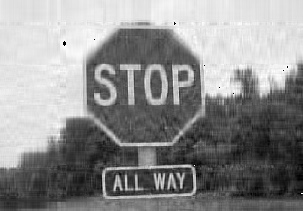

In [0]:
URL = "https://kaityo256.github.io/python_zero/numpy/stop.jpg"
ratio = 0.1
svd(URL, ratio)

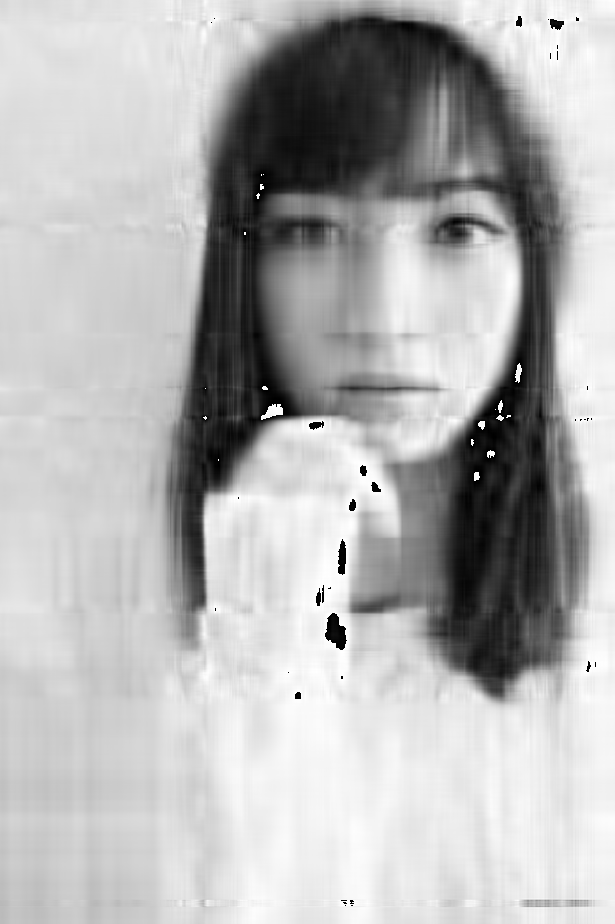

In [0]:
URL = "https://thetv.jp/i/nw/131904/735361.jpg?w=615"
ratio = 0.0175
svd(URL, ratio)